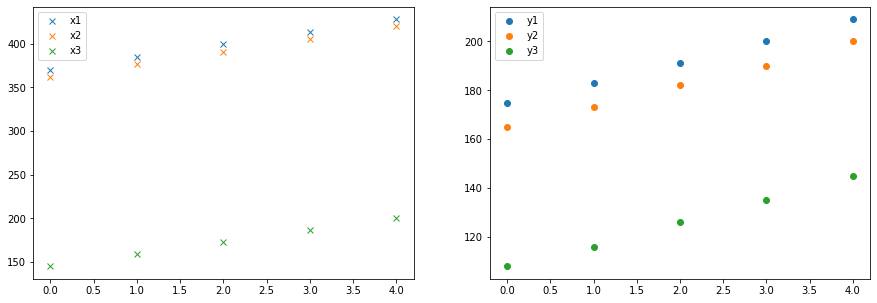

In [17]:
%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np

X3 = np.array([
    [145, 108],
    [159, 116],
    [173, 126],
    [187, 135],
    [201, 145]
])


X1 = np.array([
    [370, 175],
    [385, 183],
    [400, 191],
    [413, 200],
    [428, 209]
])

X2 = np.array([
    [362, 165],
    [377, 173],
    [391, 182],
    [406, 190],
    [420, 200]
])

fig, axs = plt.subplots(1,2,figsize=(15,5))

axs[0].plot(X1[:,0], 'x', label="x1")
axs[0].plot(X2[:,0], 'x', label="x2")
axs[0].plot(X3[:,0], 'x', label="x3")
axs[0].legend()

axs[1].plot(X1[:,1], 'o', label="y1")
axs[1].plot(X2[:,1], 'o', label="y2")
axs[1].plot(X3[:,1], 'o', label="y3")
axs[1].legend()

plt.show()

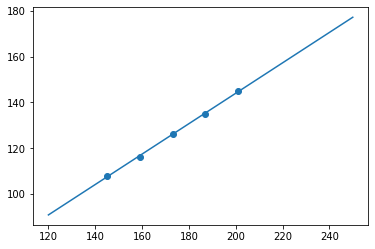

In [27]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X3[:,0].reshape(-1,1), X3[:,1])

t = np.linspace(120,250).reshape(-1,1)
z = lr.predict(t)

plt.scatter(X3[:,0], X3[:,1])
plt.plot(t, z)
plt.show()

In [37]:
dx = X1[1:,0] - X1[:-1,0]
dy = X1[1:,1] - X1[:-1,1]

print(dx)
print(dy)

[15 15 13 15]
[8 8 9 9]


In [111]:
Xin = X2

Q = np.float64(Xin).copy()

# Q[0] = [np.nan, np.nan]
Q[1] = [np.nan, np.nan]
Q[2] = [np.nan, np.nan]
# Q[3] = [np.nan, np.nan]
Q[4] = [np.nan, np.nan]

idxs = np.where(np.all(~np.isnan(Q), axis=-1))[0]
c_idxs = np.where(np.all(np.isnan(Q), axis=-1))[0]

print(idxs)

Sx = Q[idxs,0]
Si = idxs

lr = LinearRegression().fit(Q[idxs,0].reshape(-1,1), Q[idxs,1])

dx = np.absolute(Sx[1:] - Sx[:-1])
dx /= np.absolute(Si[1:] - Si[:-1])
dx = np.mean(dx)

# print(Sx, Si)
print(dx)

x0 = Sx[0] - Si[0]*dx

print(x0, Sx[0])

for i in c_idxs:
    Q[i,0] = Sx[0]+(i - Si[0])*dx
    Q[i,1] = lr.predict(Q[i,0].reshape(-1,1))

print(Q)
print(Xin)

[0 3]
14.666666666666666
362.0 362.0
[[362.         165.        ]
 [376.66666667 173.33333333]
 [391.33333333 181.66666667]
 [406.         190.        ]
 [420.66666667 198.33333333]]
[[362 165]
 [377 173]
 [391 182]
 [406 190]
 [420 200]]
